In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Getting a uniform naming of the columns 
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [4]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [5]:
# Find object-type columns
categCols = list(df.select_dtypes('object').columns)
categCols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
# Replace spaces and convert to lower case
for col in categCols:
    df[col] = df[col].str.lower().str.replace(' ','_')

### EDA

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
#print(df.nunique())
for col in df.columns:
    print(f'< {col} >')
    print(df.groupby(col).size().sort_values(ascending=False).index[:5].values)
    print(f'Total unique <{col}> values: {df[col].nunique()}\n')

< make >
['chevrolet' 'ford' 'volkswagen' 'toyota' 'dodge']
Total unique <make> values: 48

< model >
['silverado_1500' 'tundra' 'f-150' 'sierra_1500' 'beetle_convertible']
Total unique <model> values: 914

< year >
[2015 2016 2017 2014 2012]
Total unique <year> values: 28

< engine_fuel_type >
['regular_unleaded' 'premium_unleaded_(required)'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Total unique <engine_fuel_type> values: 10

< engine_hp >
[200. 170. 210. 240. 285.]
Total unique <engine_hp> values: 356

< engine_cylinders >
[ 4.  6.  8. 12.  5.]
Total unique <engine_cylinders> values: 9

< transmission_type >
['automatic' 'manual' 'automated_manual' 'direct_drive' 'unknown']
Total unique <transmission_type> values: 5

< driven_wheels >
['front_wheel_drive' 'rear_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Total unique <driven_wheels> values: 4

< number_of_doors >
[4. 2. 3.]
Total unique <number_of_doors> values: 3

< market_category >
['crossover

### Checking MSRP data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

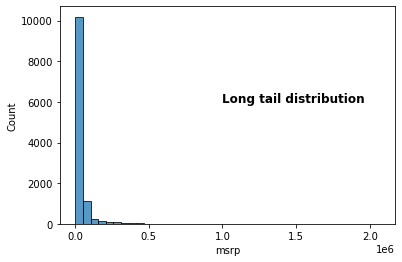

In [10]:
# Distribution of prices
sns.histplot(df.msrp, bins=40)
_ = plt.text(1e6, 6000, "Long tail distribution", horizontalalignment='left',
         size='large', color='black', weight='semibold')

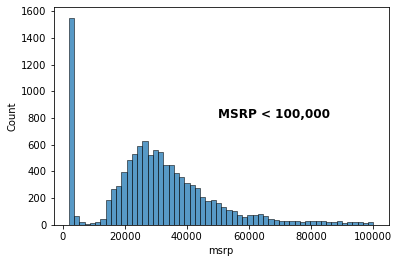

In [11]:
# Distribution of prices < $100K
sns.histplot(df.msrp[df.msrp < 1e5])
_ = plt.text(5e4, 800, "MSRP < 100,000", horizontalalignment='left',
         size='large', color='black', weight='semibold')

Text(12, 600, 'log1p MSRP')

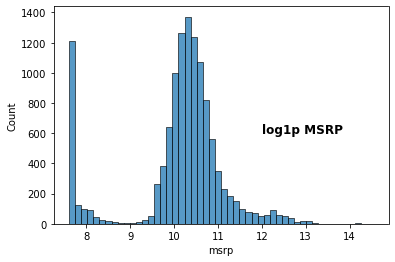

In [12]:
# Lets apply log1p to the MSRP distribution
priceLog = np.log1p(df.msrp)
_ = sns.histplot(priceLog, bins=50)
plt.text(12, 600, "log1p MSRP", horizontalalignment='left',
         size='large', color='black', weight='semibold')

### Checking missing values

In [13]:
pd.DataFrame(df.isnull().sum(), columns=['isnull'])[df.isnull().sum() != 0].\
reset_index().\
rename(columns={'index': 'column'})

,column,isnull
0,engine_fuel_type,3
1,engine_hp,69
2,engine_cylinders,30
3,number_of_doors,6
4,market_category,3742


### Validation framework

In [14]:
# Shuffled the data (rows)
n = len(df)
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [15]:
# Split the data Train:60%, Validation:20%, Test:20%
nVal = int(0.2 * n)
nTest = int(0.2 * n) 
nTrain = n - nTest - nVal

dfTrain = df.iloc[idx[:nTrain]]
dfVal = df.iloc[idx[nTrain:nTrain+nVal]]
dfTest = df.iloc[idx[nTrain+nVal:]]

print(f'The lenghts of the datasets')
print(f'*Train set: {len(dfTrain)}\t*Validation set: {len(dfVal)}\t*Test set: {len(dfTest)}')

The lenghts of the datasets
*Train set: 7150	*Validation set: 2382	*Test set: 2382


In [16]:
# Reset indeces
dfTrain.reset_index(drop=True, inplace=True)
dfVal.reset_index(drop=True, inplace=True)
dfTest.reset_index(drop=True, inplace=True)

In [17]:
# Get targets for train, val and test datasets
yTrain = np.log1p(dfTrain.msrp.values)
yVal = np.log1p(dfVal.msrp.values)
yTest = np.log1p(dfTest.msrp.values)

In [18]:
# Drop target from features data
#dfTrain.drop(columns=['msrp'], inplace=True)
#dfVal.drop(columns=['msrp'], inplace=True)
#dfTest.drop(columns=['msrp'], inplace=True)
del dfTrain['msrp']
del dfVal['msrp']
del dfTest['msrp']

### Linear Regression - Baseline Model

In [19]:
# Selection of Columns / features
base = list(dfTrain.dtypes[dfTrain.dtypes != 'object'].iloc[[1,2,4,5,6]].index)
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [20]:
dfTemp = dfTrain[base]

In [21]:
# Check NaNs
dfTemp.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [22]:
# Replace NaNs with "Zeros"
dfTemp.fillna(0, inplace=True)
dfTemp.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [23]:
# Get XTrain numpy values (array)
XTrain = dfTemp.values

In [24]:
# Linear Regresion implementation

def TrainLinearReg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTXInv = np.linalg.inv(XTX)
    w = XTXInv.dot(X.T).dot(y)
    return w[0], w[1:]

Model parameters: w0:7.927257388070117 - w:[ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]
Predictions: [ 9.54792783  9.38733977  9.67197758 ... 10.30423015 11.9778914
  9.99863111]


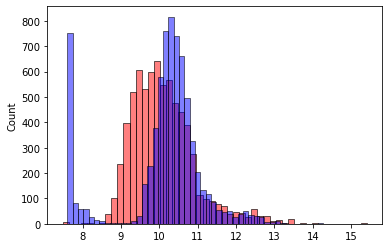

In [25]:
# Get model parameters and compare target and predicted target

w0, w = TrainLinearReg(XTrain, yTrain)
print(f'Model parameters: w0:{w0} - w:{w}')
yPred = w0 + XTrain.dot(w)
print(f'Predictions: {yPred}')
_ = sns.histplot(yPred, color='red', alpha=0.5, bins=50)
_ = sns.histplot(yTrain, color='blue', alpha=0.5, bins=50)

### RMSE

In [26]:
# Function to calculate the rmse error

def RMSE(y, yPred):
    sqrerr = (y - yPred)**2
    mse = np.sqrt(sqrerr.mean())
    return mse

In [27]:
# Calculating the error on the train dataset

trainError = RMSE(yTrain, yPred)
trainError

0.7554192603920132

### Validation

In [28]:
# Function to prepare and clean up dataframes

def prepareX(df):
    dfTemp = df[base]
    dfTemp.fillna(0, inplace=True)
    X = dfTemp.values
    return X

In [29]:
# Calculate validation y and error

Xtrain = prepareX(dfTrain)
w0, w = TrainLinearReg(XTrain, yTrain)

XVal = prepareX(dfVal)
yValPred = w0 + XVal.dot(w)
valErr = RMSE(yVal, yValPred)
print(f'Validation error: {valErr}')

Validation error: 0.7616530991301601


### Feature Engineering

In [30]:
# Function to prepare and clean up dataframes

def PrepareX(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = base + ['age']
    dfTemp = df[features]
    #dfTemp = df[base]
    dfTemp.fillna(0, inplace=True)
    X = dfTemp.values
    return X

Model parameters: w0:9.286850605506004 - w:[ 3.87296543e-03  7.24889532e-02 -2.59712372e-03  1.10445120e-02
 -4.77015685e-05 -9.31651725e-02]
Predictions: [ 9.42481528  9.71833495 10.23946388 ... 10.74368095 12.14263879
 10.47222446]
Validation error: 0.5172055461058335


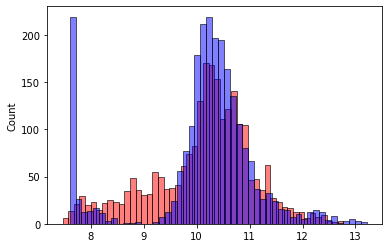

In [31]:
# Calculate validation y and error

XTrain = PrepareX(dfTrain)
w0, w = TrainLinearReg(XTrain, yTrain)

XVal = PrepareX(dfVal)
yValPred = w0 + XVal.dot(w)
valErr = RMSE(yVal, yValPred)

print(f'Model parameters: w0:{w0} - w:{w}')
yPred = w0 + XTrain.dot(w)
print(f'Predictions: {yPred}')
print(f'Validation error: {valErr}')

_ = sns.histplot(yValPred, color='red', alpha=0.5, bins=50)
_ = sns.histplot(yVal, color='blue', alpha=0.5, bins=50)

In [32]:
# On-Hot-Encoding of categorical features

def OneHotCategorical(df, dims):
    newDims = []
    newdf = df.copy()
    #print(dims)
    for dim in dims:   
        #print(dim)
        for val in dfTrain[dim].value_counts().head().index:
            #print('***',val)
            newdf[f'{dim}_{val}'] = (newdf[dim] == val).astype('int')
            newDims.append(f'{dim}_{val}')
    return newdf, newDims

In [33]:
# Data preparation

def PrepareX(df):
    newdf = df.copy()
    newdf['age'] = 2017 - newdf['year']
    features = base + ['age']
    
    dims = ['number_of_doors']
    newdf, newDims = OneHotCategorical(newdf, dims)
    features += newDims

    dims = ['make', 'engine_fuel_type', 'transmission_type','driven_wheels',
            'market_category','vehicle_size','vehicle_style']
    newdf, newDims = OneHotCategorical(newdf, dims)
    features += newDims

    dfTemp = newdf[features]
    dfTemp.fillna(0, inplace=True)
    X = dfTemp.values
    return X

In [34]:
# Calculate validation y and error

XTrain = PrepareX(dfTrain)
w0, w = TrainLinearReg(XTrain, yTrain)

XVal = PrepareX(dfVal)
yValPred = w0 + XVal.dot(w)
valErr = RMSE(yVal, yValPred)

print(f'Model parameters: w0:{w0} - w:{w}')
yPred = w0 + XTrain.dot(w)
trainErr = RMSE(yTrain, yPred)
print()
print(f'Predictions: {yPred}')
print(f'Train error: {trainErr}')
print(f'Validation error: {valErr}')

Model parameters: w0:-3.0813475980763172e+16 - w:[-4.40823681e-01 -3.22830755e+01 -2.75355651e+01 -6.83109891e+01
  1.96393117e-02 -1.57952735e+01 -5.25456865e+04 -5.28676624e+04
 -5.31863620e+04  3.99250749e+01  3.72285830e+01 -1.37322820e+02
  1.57738523e+02 -5.13242869e+01  1.20830632e+03  1.21766462e+03
  1.20708943e+03  1.15478745e+03  2.21306258e+03  4.96694357e+16
  4.96694357e+16  4.96694357e+16  4.96694357e+16  4.96694357e+16
 -1.88559598e+16 -1.88559598e+16 -1.88559598e+16 -1.88559598e+16
 -9.68577363e+01  1.93173700e+01  2.54707277e+01  2.15150274e+02
  1.40198690e+02  1.90114352e+03  1.76340965e+03  1.53633942e+03
 -4.85492239e-02  5.44797374e-02  1.78241160e-01  3.41906701e-01
 -1.64412078e-01]

Predictions: [-412.  228. -784. ... -432. -188.   68.]
Train error: 1542.510369970822
Validation error: 506.27579457420126


### Regularization

In [35]:
# Regularization function

def regularization(X, r=1e-3):
    return X + r * np.eye(X.shape[0])


# New model function including regularization

def TrainLinearReg(X, y, r=1e-3):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = regularization(XTX, r)
    
    XTXInv = np.linalg.inv(XTX)
    w = XTXInv.dot(X.T).dot(y)
    return w[0], w[1:]

In [36]:
# Calculate validation y and error

XTrain = PrepareX(dfTrain)
w0, w = TrainLinearReg(XTrain, yTrain, r=0.01)

XVal = PrepareX(dfVal)
yValPred = w0 + XVal.dot(w)
valErr = RMSE(yVal, yValPred)

print(f'Model parameters: w0:{w0} - w:{w}')
yPred = w0 + XTrain.dot(w)
trainErr = RMSE(yTrain, yPred)
print()
print(f'Predictions: {yPred}')
print(f'Train error: {trainErr}')
print(f'Validation error: {valErr}')


Model parameters: w0:6.276604934242101 - w:[ 1.74662292e-03  1.10388876e-01 -5.09610915e-03 -5.90147528e-03
 -5.03725269e-05 -9.61981231e-02 -6.06574068e-01 -7.75065011e-01
 -8.79365683e-01 -4.24117367e-02  1.77091822e-01  1.38942853e-02
 -9.98087945e-02 -1.07723487e-01 -4.60189119e-01  6.99882687e-02
 -3.26371211e-01 -5.39206960e-01 -9.13568066e-02  1.09235948e+00
  9.22836694e-01  1.15309106e+00  2.61933778e+00  4.88983909e-01
  1.60511637e+00  1.53501046e+00  1.59823524e+00  1.53824231e+00
 -8.49615959e-02  4.57395757e-02 -4.80594024e-02  8.53486542e-03
 -3.56951055e-02  2.17756876e+00  2.06241139e+00  2.03662526e+00
 -4.85610158e-02  5.45307864e-02  1.78221655e-01  3.41920493e-01
 -1.64549139e-01]

Predictions: [ 9.33738217  9.60726342 10.13981276 ... 10.57142107 12.18680465
 10.58870478]
Train error: 0.4602099520222216
Validation error: 0.4565219901386227


### Tuning the model

In [37]:
# Testing with different values for regularization

regParameters = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

for r in regParameters:
    XTrain = PrepareX(dfTrain)
    w0, w = TrainLinearReg(XTrain, yTrain, r=0.01)
    
    XVal = PrepareX(dfVal)
    yValPred = w0 + XVal.dot(w)
    valErr = RMSE(yVal, yValPred)
    yPred = w0 + XTrain.dot(w)
    trainErr = RMSE(yTrain, yPred)

    print('###############################')
    print(f'r={r}, W0={round(w0,8)}, Train error: {round(trainErr,8)}, Validation error={round(valErr,8)}')

###############################
r=0, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=1e-05, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=0.0001, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=0.001, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=0.01, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=0.1, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=1, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199
###############################
r=10, W0=6.27660493, Train error: 0.46020995, Validation error=0.45652199


### Using the model

In [38]:
# full train dataset (train + val)

dfFull = pd.concat([dfTrain, dfVal]).reset_index(drop=True)
dfFull

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [39]:
# Full ys

yFull = np.concatenate([yTrain, yVal])
yFull

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [40]:
# Culculation of model and errors for extended full train dataset

XFull = PrepareX(dfFull)
w0, w = TrainLinearReg(XFull, yFull, r=0.01)

XTest = PrepareX(dfTest)
yTestPred = w0 + XTest.dot(w)
testErr = RMSE(yTest, yTestPred)

print(f'Model parameters: w0:{w0} - w:{w}')
print(w.shape)
yPred = w0 + XTrain.dot(w)
trainErr = RMSE(yTrain, yPred)
print()
print(f'Predictions: {yTest}')
print(f'Train error: {trainErr}, Validation error: {testErr}')


Model parameters: w0:6.314022625853538 - w:[ 1.52553386e-03  1.18232560e-01 -6.64568689e-03 -5.31969464e-03
 -4.87602236e-05 -9.68998809e-02 -6.21529450e-01 -7.79057297e-01
 -8.77169441e-01 -4.14528067e-02  1.75551592e-01 -5.38706568e-04
 -1.00581806e-01 -9.27472872e-02 -4.66176279e-01  8.05174300e-02
 -3.15362351e-01 -5.51292342e-01 -7.84547864e-02  1.09275601e+00
  9.17458258e-01  1.14698878e+00  2.64965254e+00  5.07142103e-01
  1.62732589e+00  1.52807813e+00  1.61531603e+00  1.54331153e+00
 -9.70363117e-02  3.73309504e-02 -5.81840952e-02 -1.19871447e-02
 -2.36205368e-02  2.18604754e+00  2.07167340e+00  2.05629994e+00
 -5.00991813e-02  5.62519559e-02  1.84780006e-01  3.32653127e-01
 -1.58921282e-01]
(41,)

Predictions: [ 7.60140233  8.07464908 10.34563811 ... 10.27852782 10.00789261
 10.40414162]
Train error: 0.4605582354100096, Validation error: 0.4517787581255119


In [43]:
# Car for test from the test set

carNumber = 19
testCar = dfTest.iloc[carNumber].to_dict()
testCarDF = pd.DataFrame([testCar])
testCar

{'make': 'mercedes-benz',
 'model': '560-class',
 'year': 1990,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 238.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'large',
 'vehicle_style': 'sedan',
 'highway_mpg': 16,
 'city_mpg': 12,
 'popularity': 617}

In [44]:
# Predict value of the car and compare con original data

XtestCar = PrepareX(testCarDF)
yTestPred = w0 + XtestCar.dot(w)
yTestPred = yTestPred[0]
#print(yTestPred)
yTestPred = round(np.expm1(yTestPred),2)
print(f'Predicted test car value: {yTestPred}')
# Price of the car from the dataset
testCarPrice = round(np.expm1(yTest[carNumber]),2)
print(f'Price of the car from the dataset: {testCarPrice}')
print(f'Difference between predicted price and original price: {round(yTestPred - testCarPrice)}')

Predicted test car value: 3973.11
Price of the car from the dataset: 2170.0
Difference between predicted price and original price: 1803
